## Table of Contents
1. Introduction and Imports
2. Data Cleaning and text-preprocessing
3. Analysis and Visualization
4. Imbalance Handling


## 1. Introduction and Imports

In [1]:
import os
from os import remove
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import seaborn as sns
import re

import wordcloud

from wordcloud import WordCloud ,STOPWORDS, ImageColorGenerator


In [2]:
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')


In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer


In [36]:
# loading the data

data1=pd.read_csv('Resources/completeSpamAssassin.csv',encoding='latin-1')
data1=data1[['Body','Label']]
data1.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [37]:

data2=pd.read_csv('Resources/enronSpamSubset.csv',encoding='latin-1')
data2=data2[['Body','Label']]
data2.head()

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1


In [38]:

data3=pd.read_csv('Resources/lingSpam.csv',encoding='latin-1')
data3=data3[['Body','Label']]
data3.head()

,Body,Label
0,Subject: great part-time or summer job !\n \n ...,1
1,Subject: auto insurance rates too high ?\n \n ...,1
2,Subject: do want the best and economical hunti...,1
3,Subject: email 57 million people for $ 99\n \n...,1
4,Subject: do n't miss these !\n \n attention ! ...,1


## 2. Data cleaning and Text preprocessing

In [49]:
dataset=pd.merge(data1,data2,how='outer')
dataset=pd.merge(dataset,data3,how='outer')

dataset.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
4,##############################################...,1


In [9]:
# showing value counts of ham and spam
dataset['Label'].value_counts()

0    11322
1     7329
Name: Label, dtype: int64

In [40]:
dataset.drop_duplicates(subset=['Body'],inplace=True)
dataset.dropna(inplace=True)
dataset.reset_index(inplace=True,drop=True)

dataset['Label'].value_counts()

0    11009
1     6561
Name: Label, dtype: int64

[]

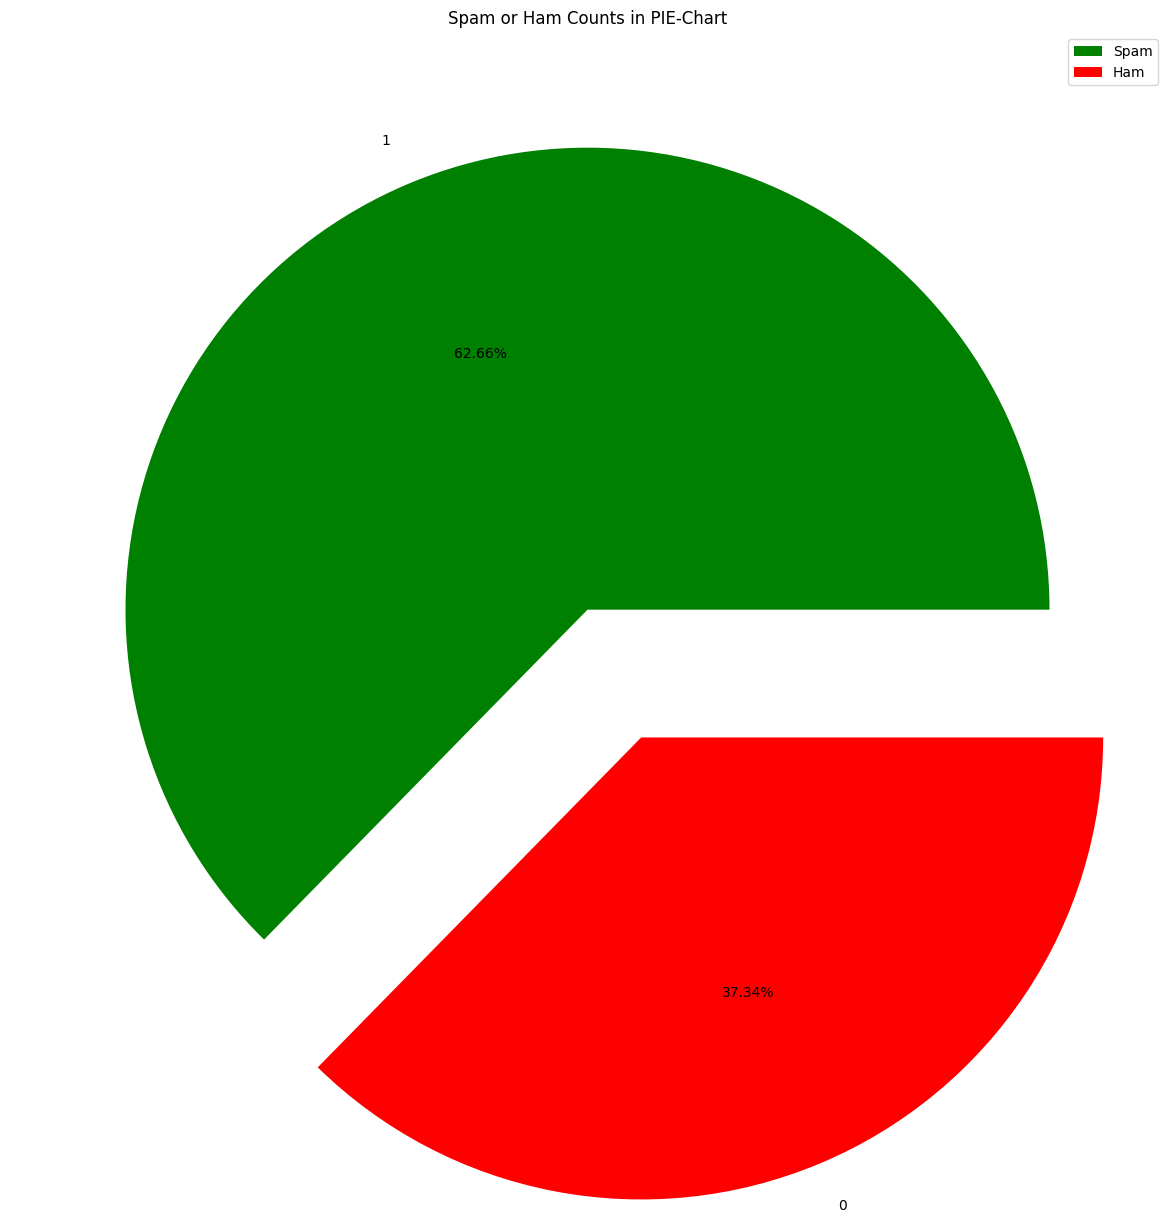

In [12]:
# Visualizing the count of spam and ham messages in pie-chart

plt.figure(figsize=(15,15))
plt.title('Spam or Ham Counts in PIE-Chart')
plt.pie(dataset['Label'].value_counts(),labels=dataset['Label'].unique(),explode=[0,0.3],autopct='%1.2f%%',colors=['green','red'])
plt.legend(['Spam','Ham'])
plt.savefig('Captures/pie_value_counts1.png',dpi=400,bbox_inches='tight')
plt.plot()

In [13]:
dataset.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [32]:
   
#stopwords of english language
stops=set(stopwords.words('english'))
stops.add('subject')

lemmatizer=WordNetLemmatizer()

def clean_text(text):
    # replacing all characters except alphabets with space
    temp=re.sub('[^a-zA-Z]',' ',text)

    # Lowering all the characters
    temp=temp.lower()

    # Splitting the sentences into set of words
    temp=temp.split()

    temp=[x for x in temp if x not in stops]
    

    # lemmatize the word if it is not present in stopwords
    temp=[lemmatizer.lemmatize(word) for word in temp ]

    #Joining the Lemmatized words with space
    temp=' '.join(temp)

    # Returning the cleaned sentences
    return temp


In [41]:
dataset['Body']=dataset['Body'].apply(clean_text)
dataset.head()

,Body,Label
0,save life insurance spend life quote saving en...,1
1,fight risk cancer http www adclick w p cfm pk ...,1
2,fight risk cancer http www adclick w p cfm pk ...,1
3,adult club offer free membership instant acces...,1
4,thought might like slim guaranteed lose lb day...,1


## 3. Analysis and Visualization

In [16]:

def draw_wordcloud(text_list):
    
    text=' '.join(text_list.astype(str).to_list())
    stop = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stop,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(20,14), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title('Spam Messages', fontsize=20 )
    plt.show()
    
    


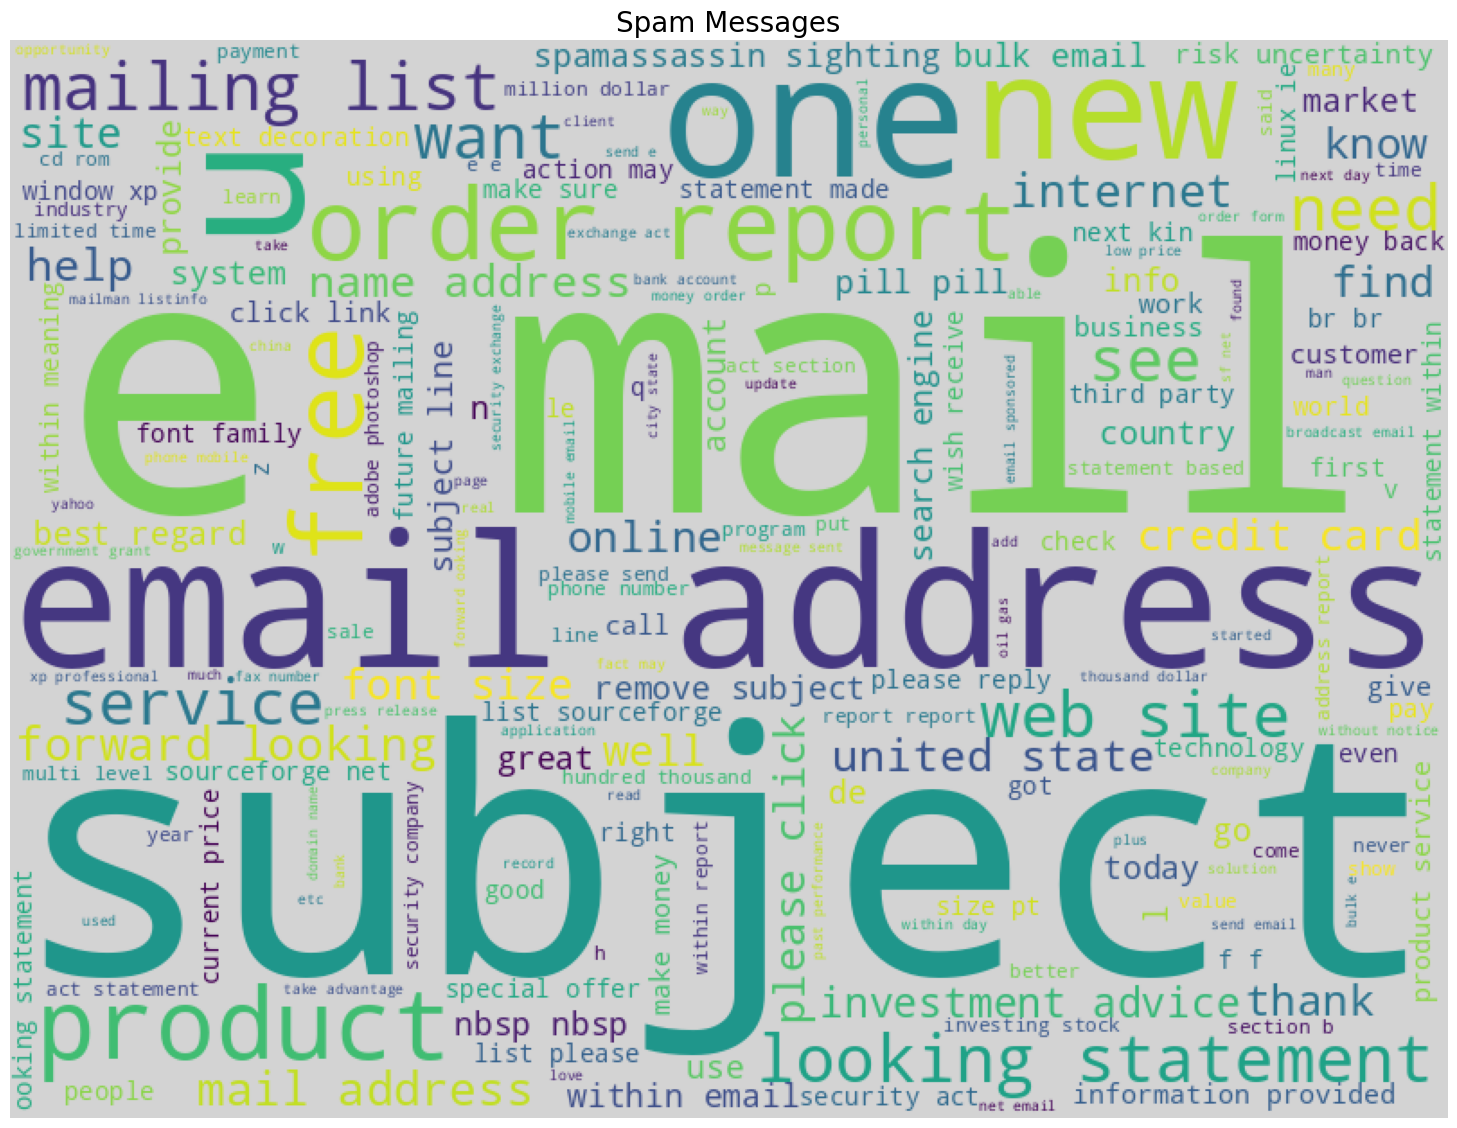

In [17]:

draw_wordcloud(dataset[dataset.Label==1]['Body'])

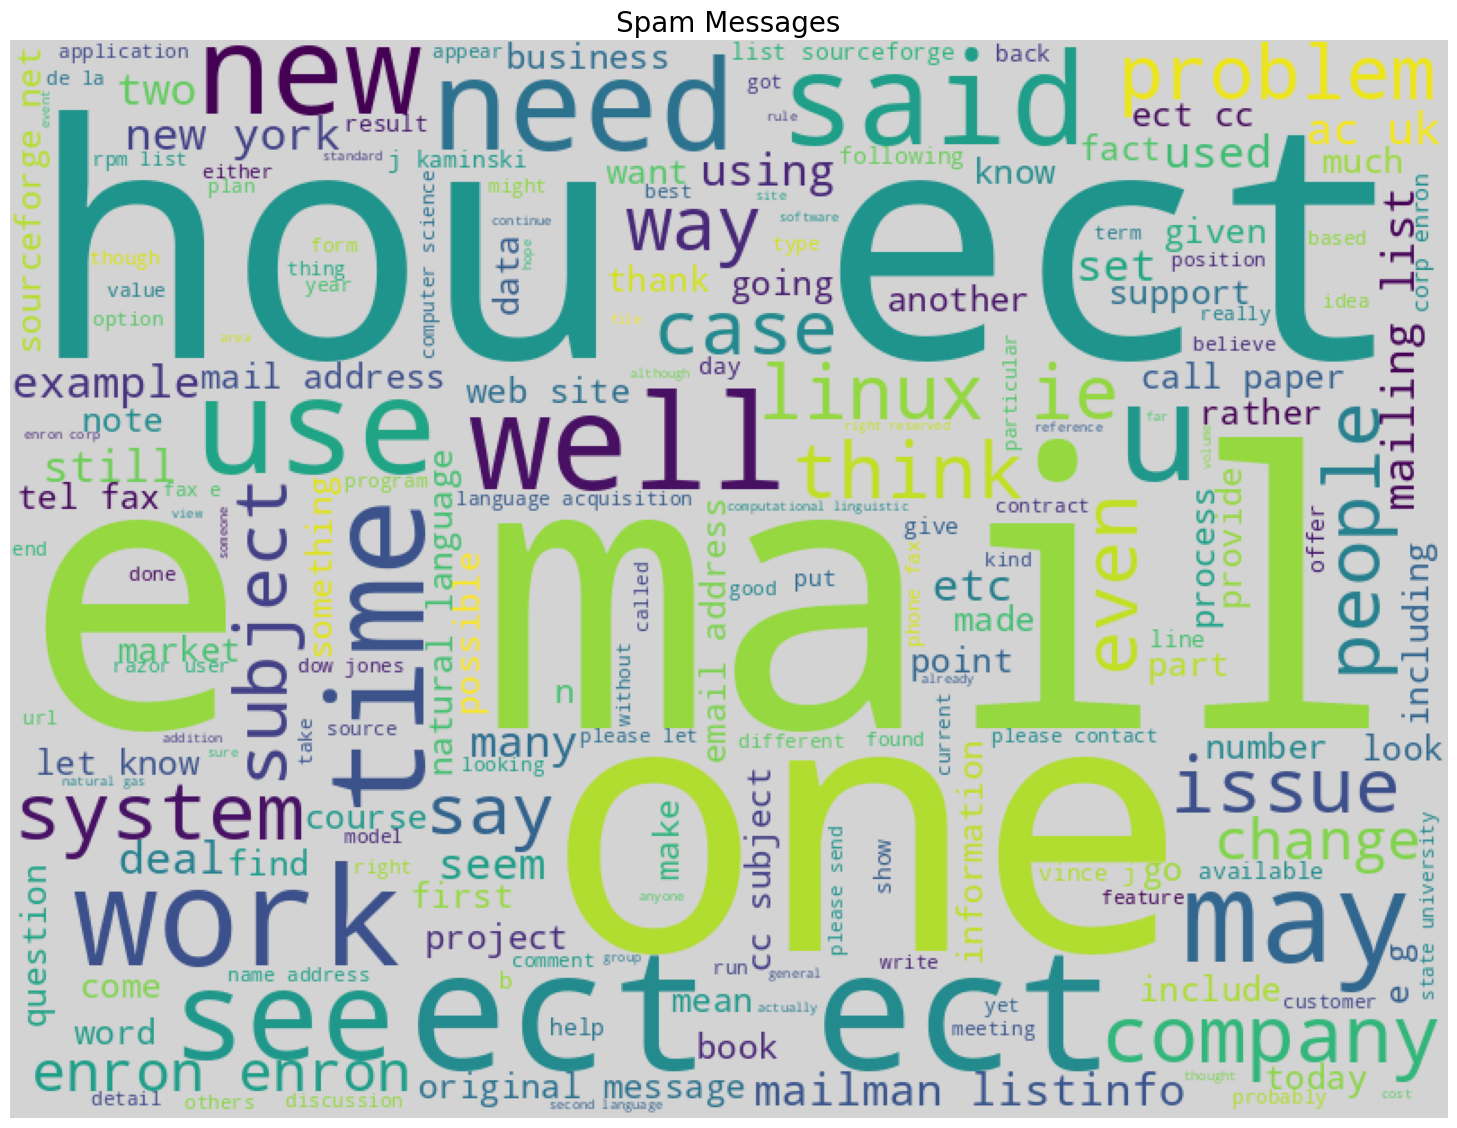

In [18]:
draw_wordcloud(dataset[dataset.Label==0]['Body'])

In [50]:

# creating new column of the number of words charaters and sentences
dataset['word_count']=dataset['Body'].apply(lambda x:len(str(x).split()))
dataset['char_count']=dataset['Body'].apply(lambda x:len(str(x)))
dataset['sentence_count']=dataset['Body'].apply(lambda x:len(str(x).split('.')))

# Removing the outliers of 99.99% of the data independently

dataset=dataset[dataset['word_count']<dataset['word_count'].quantile(0.999)]
dataset=dataset[dataset['char_count']<dataset['char_count'].quantile(0.999)]
dataset=dataset[dataset['sentence_count']<dataset['sentence_count'].quantile(0.999)]

dataset.shape

(18594, 5)

/home/nitish/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/nitish/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

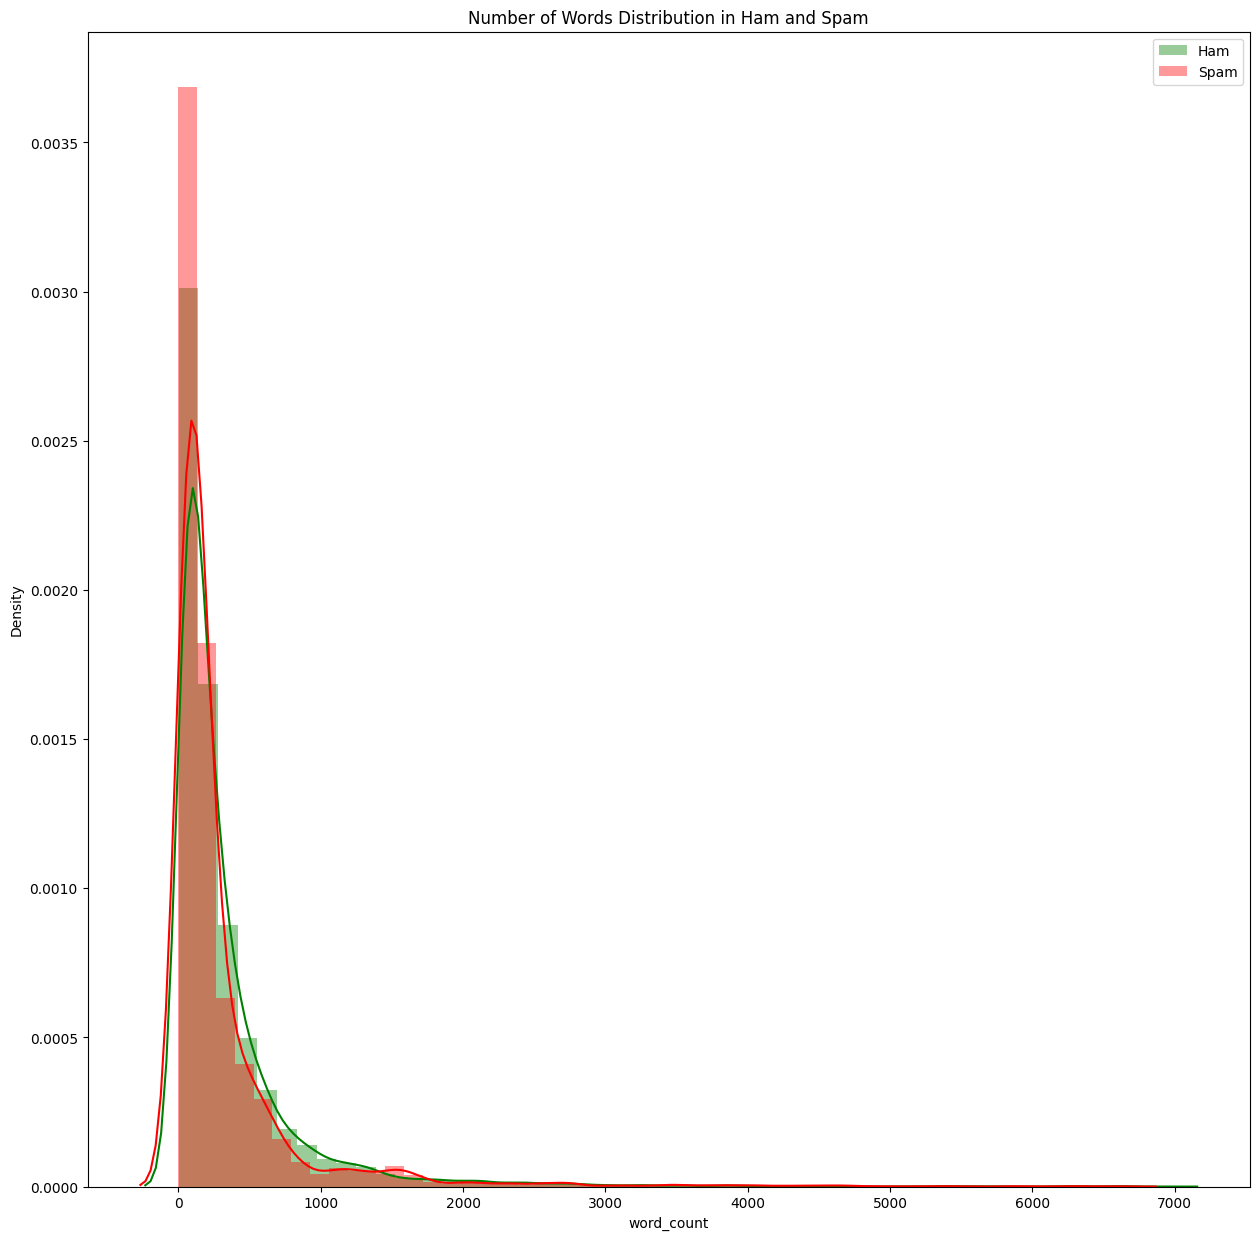

In [51]:

# Visualizing the number of words distribution in ham and spam
plt.figure(figsize=(15,15))
plt.title('Number of Words Distribution in Ham and Spam')
sns.distplot(dataset[dataset.Label==0]['word_count'],color='green',label='Ham')
sns.distplot(dataset[dataset.Label==1]['word_count'],color='red',label='Spam')
plt.legend()
plt.savefig('Captures/word_count_dist.png',dpi=400,bbox_inches='tight')
plt.plot()


[]

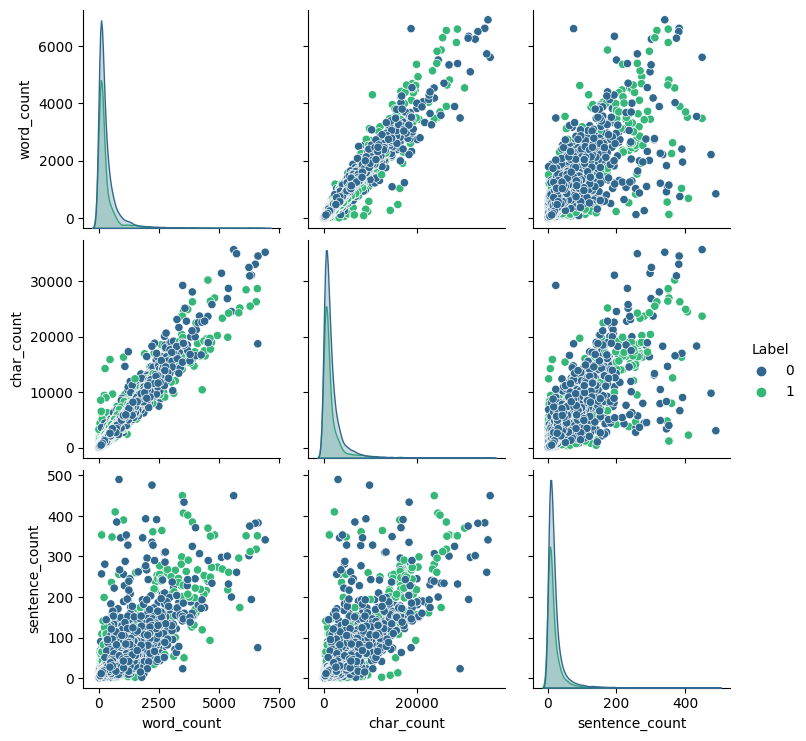

In [52]:

# pairplot
sns.pairplot(dataset,hue='Label',palette='viridis')
plt.savefig('Captures/pairplot.png',dpi=400,bbox_inches='tight')
plt.plot()


[]

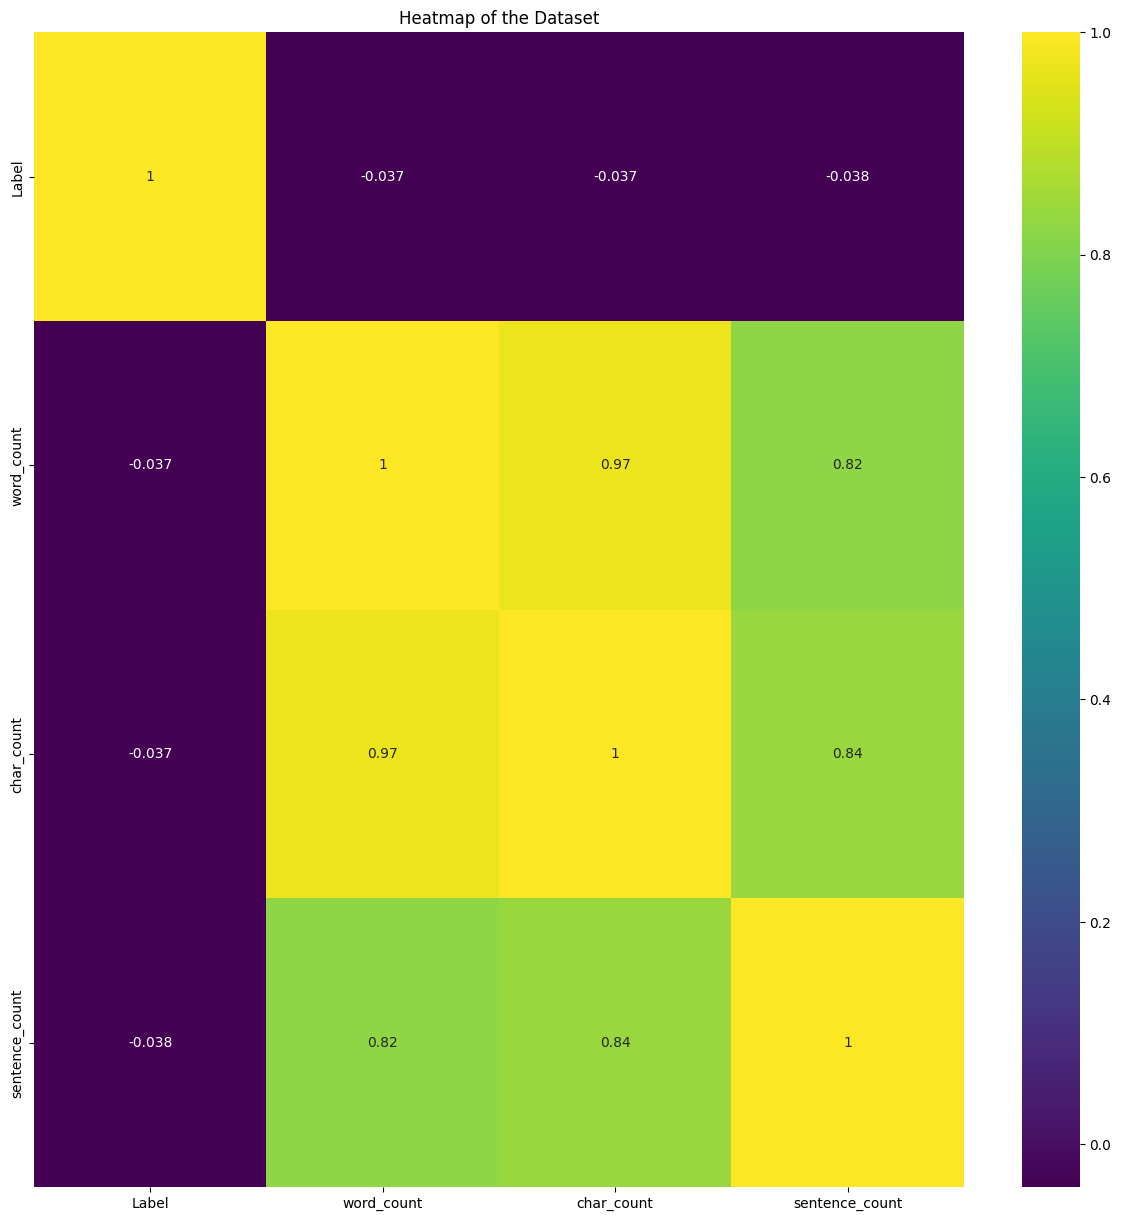

In [53]:
# heatmap

plt.figure(figsize=(15,15))
plt.title('Heatmap of the Dataset')
sns.heatmap(dataset.corr(),annot=True,cmap='viridis')
plt.savefig('Captures/heatmap.png',dpi=400,bbox_inches='tight')
plt.plot()


### Saving the Datset

In [54]:

# saving the prepared dataset
dataset.to_csv('Resources/prepared_dataset.csv',index=False)
